In [3]:
from dotenv import load_dotenv

load_dotenv()

True

In [4]:
from langchain_google_genai import ChatGoogleGenerativeAI

In [5]:
llm = ChatGoogleGenerativeAI(model="gemini-pro")
result = llm.invoke("List 8 wonders of the word")
print(result)

content='1. Great Wall of China\n2. Chichen Itza\n3. Christ the Redeemer\n4. Colosseum\n5. Machu Picchu\n6. Petra\n7. Taj Mahal\n8. Great Pyramid of Giza' response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'safety_ratings': [{'category': 'HARM_CATEGORY_SEXUALLY_EXPLICIT', 'probability': 'NEGLIGIBLE', 'blocked': False}, {'category': 'HARM_CATEGORY_HATE_SPEECH', 'probability': 'NEGLIGIBLE', 'blocked': False}, {'category': 'HARM_CATEGORY_HARASSMENT', 'probability': 'NEGLIGIBLE', 'blocked': False}, {'category': 'HARM_CATEGORY_DANGEROUS_CONTENT', 'probability': 'NEGLIGIBLE', 'blocked': False}]} id='run-ccb77905-50da-4168-9c4f-e0ac579ef60e-0' usage_metadata={'input_tokens': 8, 'output_tokens': 46, 'total_tokens': 54}


### Streaming and Batching


In [6]:
for chunk in llm.stream("8 Wonders of World"):
    print(chunk.content)

**Ancient Wonders of the World**

* **Great Pyramid of Giza,
 Egypt**
* **Hanging Gardens of Babylon, Iraq** (destroyed)
* **Statue of Zeus at Olympia, Greece** (destroyed)
* **
Temple of Artemis at Ephesus, Turkey** (destroyed)
* **Mausoleum at Halicarnassus, Turkey** (destroyed)
* **Colossus of Rhodes, Greece** (destroyed)
* **Lighthouse of Alexandria, Egypt** (destroyed)

**New Wonders of the World** (
selected in 2007)

* **Great Wall of China, China**
* **Chichen Itza, Mexico**
* **Christ the Redeemer, Brazil**
* **Colosseum, Italy**
* **Machu Picchu, Peru**
* **Petra, Jordan**
* **Taj Mahal, India**


In [7]:
result = llm.batch(
    [
        "What's 2 +2 ?",
        "What's 34.9 + 23.78?"
    ]
)
for _result in result:
    print(_result.content)

4
58.68


### Multimodal

In [8]:
import requests
from IPython.display import Image

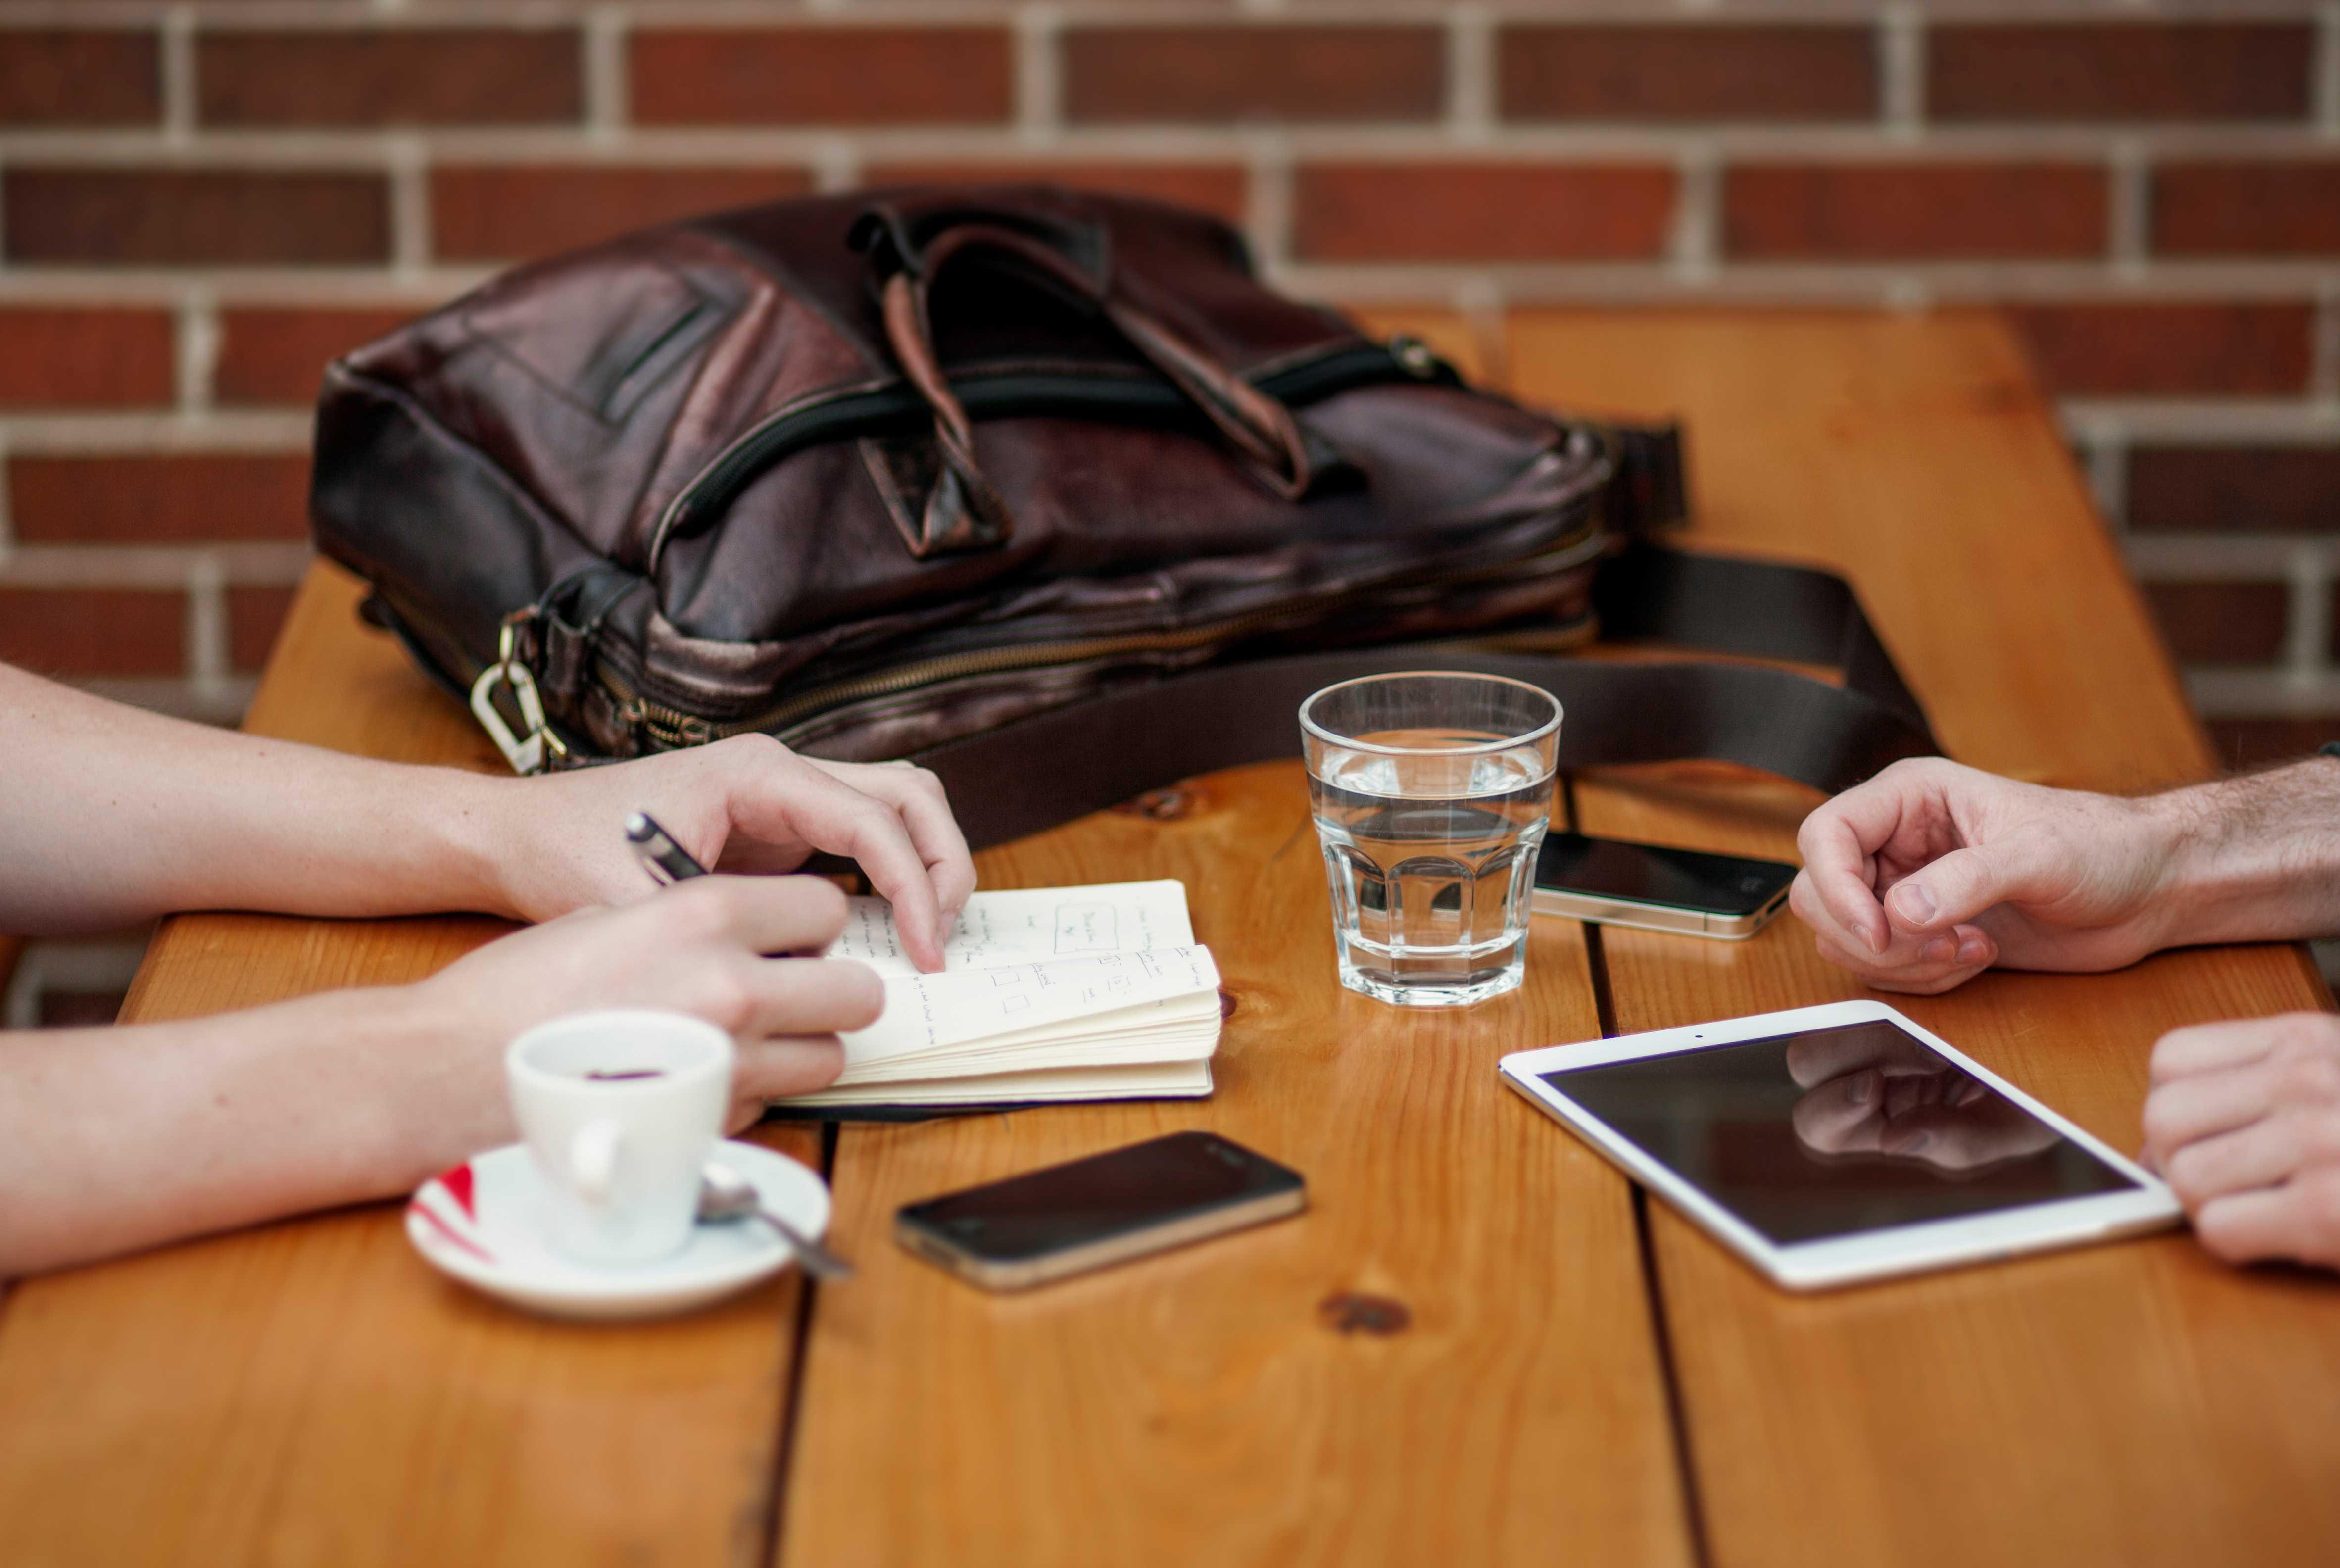

In [9]:
image_url = "https://fastly.picsum.photos/id/7/4728/3168.jpg?hmac=c5B5tfYFM9blHHMhuu4UKmhnbZoJqrzNOP9xjkV4w3o"
content = requests.get(image_url).content
Image(content)

In [10]:
from langchain_core.messages import HumanMessage

In [11]:
llm = ChatGoogleGenerativeAI(model="gemini-1.5-flash-001")

messages = HumanMessage(
    content=[
        {
            "type": "text",
            "text": "list the object names present in the image."
        },
        {
            "type": "image_url",
            "image_url": image_url
        }
    ]
)

In [12]:
for chunk in llm.stream([messages]):
    print(chunk.content)

-
 bag
- notebook
- pen
- cup
- saucer
- glass

- phone
- tablet
- table
- hand
- brick wall


### System & Human Message

In [14]:
from langchain_core.messages import SystemMessage, HumanMessage

llm = ChatGoogleGenerativeAI(model="gemini-pro", convert_system_message_to_human=True)

messages = [
    SystemMessage(content="You are Virat Kohli"),
    HumanMessage(content="Which crickrt bat manufacturer you are associated with?")
]

result = llm.invoke(messages)
print(result.content)

/home/arslanhaider/.local/share/virtualenvs/generative-ai-cfm5DT86/lib/python3.12/site-packages/langchain_google_genai/chat_models.py:352: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")


MRF
